In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-sales-report/Car Sales.xlsx - car_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

In [3]:
car_data = pd.read_csv('/kaggle/input/car-sales-report/Car Sales.xlsx - car_data.csv')

In [4]:
car_data.head(10)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
5,C_CND_000006,1/2/2022,Guadalupe,Male,850000,Classic Chevy,Mitsubishi,Diamante,Overhead Camshaft,Manual,Pale White,12000,85257-3102,Hatchback,7315216,Scottsdale
6,C_CND_000007,1/2/2022,Hailey,Male,1600000,Clay Johnson Auto Sales,Toyota,Corolla,Overhead Camshaft,Manual,Pale White,14000,78758-7841,Passenger,7727879,Austin
7,C_CND_000008,1/2/2022,Graham,Male,13500,U-Haul CO,Mitsubishi,Galant,DoubleÂ Overhead Camshaft,Auto,Pale White,42000,78758-7841,Passenger,6206512,Austin
8,C_CND_000009,1/2/2022,Naomi,Male,815000,Rabun Used Car Sales,Chevrolet,Malibu,Overhead Camshaft,Manual,Pale White,82000,85257-3102,Hardtop,7194857,Pasco
9,C_CND_000010,1/2/2022,Grayson,Female,13500,Rabun Used Car Sales,Ford,Escort,DoubleÂ Overhead Camshaft,Auto,Pale White,15000,85257-3102,Passenger,7836892,Scottsdale


In [5]:
car_data.tail(10)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
23896,C_CND_023897,12/31/2023,Simi,Male,761000,Rabun Used Car Sales,Dodge,Viper,DoubleÂ Overhead Camshaft,Auto,Red,41000,85257-3102,SUV,8744249,Aurora
23897,C_CND_023898,12/31/2023,Simone,Male,520000,Progressive Shippers Cooperative Association No,Mercedes-B,E-Class,DoubleÂ Overhead Camshaft,Auto,Red,15000,53546-9427,Sedan,6819422,Greenville
23898,C_CND_023899,12/31/2023,Skylar,Male,530000,Rabun Used Car Sales,Volvo,C70,Overhead Camshaft,Manual,Pale White,24000,85257-3102,Hatchback,6225183,Pasco
23899,C_CND_023900,12/31/2023,Yuna,Male,13500,U-Haul CO,Buick,Park Avenue,DoubleÂ Overhead Camshaft,Auto,Pale White,62000,78758-7841,Hatchback,8384785,Aurora
23900,C_CND_023901,12/31/2023,Nathan,Female,771000,Buddy Storbeck's Diesel Service Inc,Ford,Contour,DoubleÂ Overhead Camshaft,Auto,Red,19000,06457-3834,Sedan,8170003,Greenville
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin
23905,C_CND_023906,12/31/2023,Donovan,Male,1225000,Pars Auto Sales,Lexus,ES300,DoubleÂ Overhead Camshaft,Auto,Pale White,27500,38701-8047,Hardtop,7020564,Middletown


In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [7]:
#check missing values

missing_values = car_data.iloc[:, :10].isnull().sum()

missing_values

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
dtype: int64

Data Cleaning

In [8]:
# Drop rows with any NaN values

car_data_dropped_rows = car_data.dropna(axis=0) 

print(car_data_dropped_rows)

             Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition 

In [9]:
# Remove duplicate rows based on all columns
car_data_unique = car_data_dropped_rows.drop_duplicates()

print(car_data_unique)

             Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition 

Convert to numpy

In [10]:
# Step 3: Convert Data pandas to numpy
car_data_unique_np = car_data_unique.to_numpy()

# Display the shape of the numpy array to understand its structure
car_data_unique_np.shape, "First row example:", car_data_unique_np[0]

((23905, 16),
 'First row example:',
 array(['C_CND_000001', '1/2/2022', 'Geraldine', 'Male', 13500,
        "Buddy Storbeck's Diesel Service Inc", 'Ford', 'Expedition',
        'DoubleÂ\xa0Overhead Camshaft', 'Auto', 'Black', 26000,
        '06457-3834', 'SUV', 8264678, 'Middletown'], dtype=object))

In [11]:
car_data_unique

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


Summary statistic

In [12]:
print(car_data_unique.columns)

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')


In [13]:
car_data_unique['Car_id'].value_counts()

Car_id
C_CND_000001    1
C_CND_015936    1
C_CND_015945    1
C_CND_015944    1
C_CND_015943    1
               ..
C_CND_007968    1
C_CND_007967    1
C_CND_007966    1
C_CND_007965    1
C_CND_023906    1
Name: count, Length: 23905, dtype: int64

In [14]:
car_data_unique['Date'].value_counts()

Date
9/5/2023      190
11/10/2023    175
12/29/2023    151
12/11/2023    140
11/24/2023    135
             ... 
6/21/2022       5
7/12/2023       5
12/9/2022       5
7/8/2022        5
6/29/2023       5
Name: count, Length: 612, dtype: int64

In [15]:
car_data_unique['Customer Name'].value_counts()

Customer Name
Thomas           92
Emma             90
Lucas            88
Nathan           80
Louis            76
                 ..
Adelin            1
Zakarya           1
Paule             1
Noeline           1
Djamel Epoine     1
Name: count, Length: 3021, dtype: int64

In [16]:
car_data_unique['Gender'].value_counts()

Gender
Male      18797
Female     5108
Name: count, dtype: int64

In [17]:
car_data_unique['Annual Income'].value_counts()

Annual Income
13500      5273
1100000     162
600000      160
800000      151
1300000     148
           ... 
2145000       1
3171000       1
1134000       1
706750        1
1369000       1
Name: count, Length: 2508, dtype: int64

In [18]:
car_data_unique['Dealer_Name'].value_counts()

Dealer_Name
Progressive Shippers Cooperative Association No    1318
Rabun Used Car Sales                               1313
Race Car Help                                      1253
Saab-Belle Dodge                                   1250
Star Enterprises Inc                               1249
Tri-State Mack Inc                                 1249
Ryder Truck Rental and Leasing                     1248
U-Haul CO                                          1247
Scrivener Performance Engineering                  1246
Suburban Ford                                      1243
Nebo Chevrolet                                      633
Pars Auto Sales                                     630
New Castle Ford Lincoln Mercury                     629
McKinney Dodge Chrysler Jeep                        629
Hatfield Volkswagen                                 629
Gartner Buick Hyundai Saab                          628
Pitre Buick-Pontiac-Gmc of Scottsdale               628
Capitol KIA                         

In [19]:
car_data_unique['Company'].value_counts()

Company
Chevrolet     1819
Dodge         1670
Ford          1614
Volkswagen    1333
Mercedes-B    1285
Mitsubishi    1277
Chrysler      1120
Oldsmobile    1111
Toyota        1110
Nissan         886
Mercury        874
Lexus          802
Pontiac        796
BMW            790
Volvo          789
Honda          708
Acura          689
Cadillac       652
Plymouth       617
Saturn         586
Lincoln        492
Audi           468
Buick          439
Subaru         405
Jeep           363
Porsche        361
Hyundai        264
Saab           210
Infiniti       195
Jaguar         180
Name: count, dtype: int64

In [20]:
car_data_unique['Model'].value_counts()

Model
Diamante         418
Silhouette       411
Prizm            411
Passat           391
Jetta            382
                ... 
Mirage            19
Alero             18
RX300             15
Avalon            15
Sebring Conv.     10
Name: count, Length: 154, dtype: int64

In [21]:
car_data_unique['Engine'].value_counts()

Engine
DoubleÂ Overhead Camshaft    12570
Overhead Camshaft            11335
Name: count, dtype: int64

In [22]:
car_data_unique['Transmission'].value_counts()

Transmission
Auto      12570
Manual    11335
Name: count, dtype: int64

In [23]:
car_data_unique['Color'].value_counts()

Color
Pale White    11255
Black          7857
Red            4793
Name: count, dtype: int64

In [24]:
car_data_unique['Price ($)'].value_counts()

Price ($)
22000    1191
19000     974
21000     873
26000     689
18000     627
         ... 
13350       1
20101       1
49601       1
13850       1
11060       1
Name: count, Length: 870, dtype: int64

In [26]:
car_data_unique['Dealer_No '].value_counts()

Dealer_No 
85257-3102    3814
53546-9427    3813
78758-7841    3753
06457-3834    3132
38701-8047    3132
99301-3882    3132
60504-7114    3129
Name: count, dtype: int64

In [27]:
car_data_unique['Body Style'].value_counts()

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2970
Name: count, dtype: int64

In [28]:
car_data_unique['Phone'].value_counts()

Phone
8602618    2
8850757    2
6955907    2
6854031    2
8895808    2
          ..
8458688    1
7112195    1
6991797    1
7742424    1
7020564    1
Name: count, Length: 23803, dtype: int64

In [29]:
car_data_unique['Dealer_Region'].value_counts()

Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3129
Middletown    3128
Greenville    3128
Name: count, dtype: int64

In [30]:
# Convert 'Date' to datetime format to extract year and month as numeric values
car_data_unique['Date'] = pd.to_datetime(car_data_unique['Date'])

# Extract year and month as separate columns
car_data_unique['Year'] = car_data_unique['Date'].dt.year
car_data_unique['Month'] = car_data_unique['Date'].dt.month

# For simplicity, let's focus on a subset of numeric data including 'Year', 'Month', 'Annual Income', and 'Price ($)'
numeric_columns = ['Year', 'Month', 'Annual Income', 'Price ($)']
numeric_data = car_data_unique[numeric_columns]

# Convert this simplified DataFrame to numpy for further analysis
numeric_data_np = numeric_data.to_numpy()

# Display the shape of this simplified numpy array and the first row as an example
numeric_data_np.shape, "First row example:", numeric_data_np[0]

((23905, 4), 'First row example:', array([ 2022,     1, 13500, 26000]))

In [32]:
car_data_unique.describe()

,Date,Annual Income,Price ($),Phone,Year,Month
count,23905,2.390500e+04,23905.000000,2.390500e+04,23905.000000,23905.000000
mean,2023-03-01 14:35:12.261033216,8.308466e+05,28089.540473,7.497753e+06,2022.554738,7.852792
min,2022-01-02 00:00:00,1.008000e+04,1200.000000,6.000101e+06,2022.000000,1.000000
25%,2022-09-20 00:00:00,3.860000e+05,18001.000000,6.746465e+06,2022.000000,5.000000
50%,2023-03-13 00:00:00,7.350000e+05,23000.000000,7.496199e+06,2023.000000,9.000000
75%,2023-09-08 00:00:00,1.176000e+06,34000.000000,8.248172e+06,2023.000000,11.000000
max,2023-12-31 00:00:00,1.120000e+07,85800.000000,8.999579e+06,2023.000000,12.000000
std,NaN,7.200208e+05,14788.592495,8.675080e+05,0.497005,3.257990


Data Visualization - Market Analysis

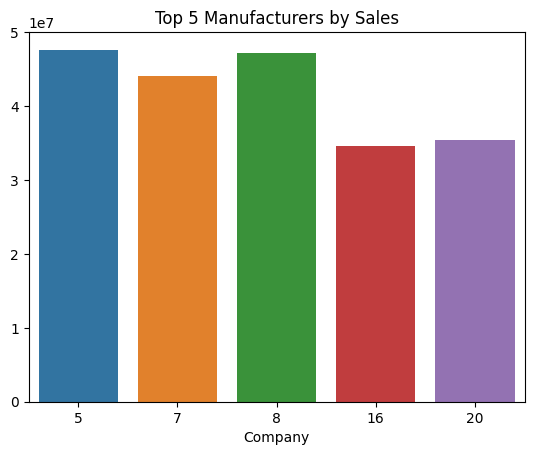

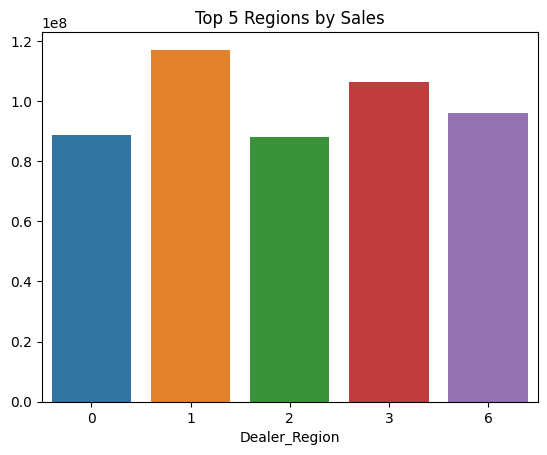

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the data
data = car_data_unique

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Encode categorical variables
categorical_columns = ['Company', 'Model', 'Dealer_Region']
for col in categorical_columns:
    data[col] = LabelEncoder().fit_transform(data[col])

# Analyze trends and regional variations
sales_by_company = data.groupby('Company')['Price ($)'].sum().sort_values(ascending=False)
sales_by_region = data.groupby('Dealer_Region')['Price ($)'].sum().sort_values(ascending=False)

# Plotting the top 5 manufacturers by sales
sns.barplot(x=sales_by_company.index[:5], y=sales_by_company.values[:5])
plt.title('Top 5 Manufacturers by Sales')
plt.show()

# Plotting the top 5 regions by sales
sns.barplot(x=sales_by_region.index[:5], y=sales_by_region.values[:5])
plt.title('Top 5 Regions by Sales')
plt.show()

Seasonal Patterns and Competitor Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


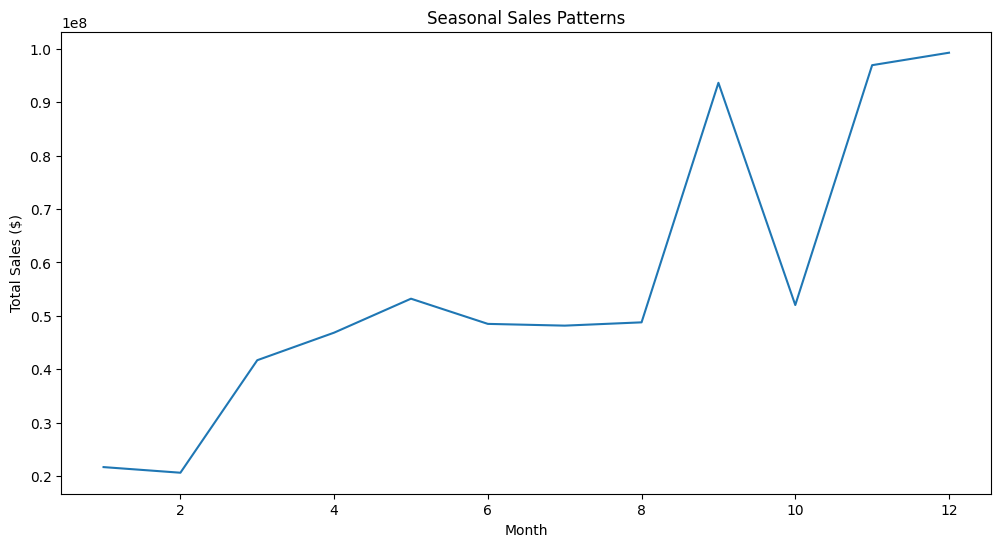

In [47]:
# Extract month from date for seasonal analysis
data['Month'] = data['Date'].dt.month

# Aggregate sales by month
monthly_sales = data.groupby('Month')['Price ($)'].sum()

# Plotting sales by month to show seasonal patterns
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Seasonal Sales Patterns')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.show()

Forecasting and Predictive Analysis

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Using Year and Month as features for forecasting
data['Year'] = data['Date'].dt.year
features = data[['Year', 'Month', 'Company', 'Dealer_Region']]
target = data['Price ($)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 217761271.56632185


Supply Chain and Inventory Optimization

In [49]:
# Insights for inventory optimization
popular_models = data['Model'].value_counts().head()
print(f'Popular models for stocking inventory: {popular_models.index.tolist()}')

# Insight into stocking by region based on sales
inventory_by_region = data.groupby('Dealer_Region')['Price ($)'].mean().sort_values(ascending=False)
print(f'Regions where higher value inventory might be needed: {inventory_by_region.index[:5].tolist()}')

Popular models for stocking inventory: [51, 137, 109, 106, 81]
Regions where higher value inventory might be needed: [1, 0, 2, 5, 6]


Machine Learning 

- Linear Regression: Predicting Car Price based on Annual Income

In [35]:
# Extracting Annual Income (independent variable) and Car Price (dependent variable)
X = numeric_data_np[:, 2].reshape(-1, 1)  # Annual Income
y = numeric_data_np[:, 3]  # Car Price

# Adding a column of ones to X for the intercept term
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add 1s for intercept

# Calculate the Best Fit Line using the Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# The first element is the intercept and the second is the coefficient for the Annual Income
theta_best

array([2.78834768e+04, 2.48016469e-04])

Histogram with machine learning

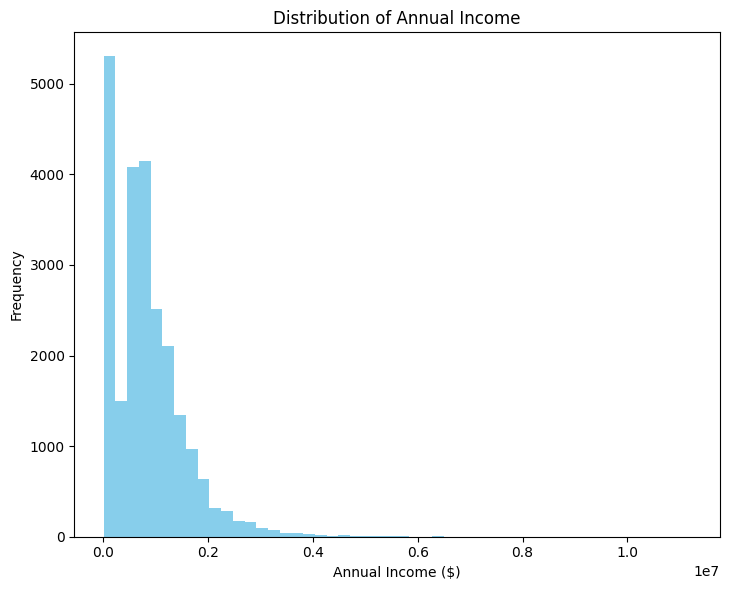

In [51]:
# Plotting histograms for 'Annual Income' and 'Price ($)'

plt.figure(figsize=(14, 6))

# Histogram for Annual Income
plt.subplot(1, 2, 1)
plt.hist(numeric_data_np[:, 2], bins=50, color='skyblue')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

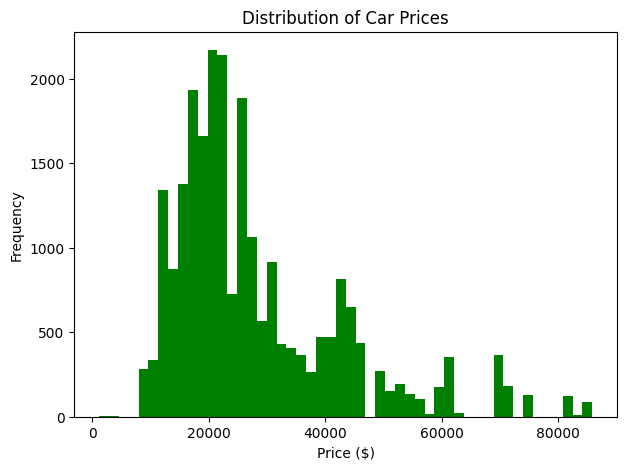

In [52]:
# Histogram for Price ($)

plt.figure(figsize=(7, 5))
plt.hist(numeric_data_np[:, 3], bins=50, color='green')
plt.title('Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()